<a href="https://www.kaggle.com/code/sejalhanmante/customer-personality-analysis-sejal-hanmante?scriptVersionId=184745858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content
Attributes**

**People**

ID: Customer's unique identifier


Year_Birth: Customer's birth year


Education: Customer's education level


Marital_Status: Customer's marital status


Income: Customer's yearly household income


Kidhome: Number of children in customer's household


Teenhome: Number of teenagers in customer's household


Dt_Customer: Date of customer's enrollment with the company


Recency: Number of days since customer's last purchase


Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**

MntWines: Amount spent on wine in last 2 years


MntFruits: Amount spent on fruits in last 2 years


MntMeatProducts: Amount spent on meat in last 2 years


MntFishProducts: Amount spent on fish in last 2 years


MntSweetProducts: Amount spent on sweets in last 2 years


MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

NumDealsPurchases: Number of purchases made with a discount


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise


AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise


AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise


AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**

NumWebPurchases: Number of purchases made through the company’s website


NumCatalogPurchases: Number of purchases made using a catalogue


NumStorePurchases: Number of purchases made directly in stores


NumWebVisitsMonth: Number of visits to company’s website in the last month

# Reading the dataset

In [2]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv",sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Check for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Dropping unnecessary columns

In [7]:
df.drop(['ID'],axis=1,inplace=True)

# EDA 

In [8]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [10]:
# Income acc. to age of customers associated with the company 
age_group = df.groupby("Year_Birth")["Income"].mean()
age_group 
px.bar(df,x="Year_Birth",y="Income")

In [11]:
# Education of Customers vs their income
edu_income = df.groupby("Education")["Income"].agg("mean")
edu_income
px.line(edu_income)

([<matplotlib.patches.Wedge at 0x7b1786297370>,
 [Text(0.8913795550384297, 0.6445482827992726, '2n Cycle'),
  Text(-0.33315738333849554, 1.0483349454859583, 'Basic'),
  Text(-1.0999421551538262, -0.011280749778098183, 'Graduation'),
  Text(-0.3232701658507096, -1.0514258889103192, 'Master'),
  Text(0.8908391670162067, -0.6452949546601702, 'PhD')],
 [Text(0.4862070300209616, 0.35157179061778504, '20%'),
  Text(-0.1817222090937248, 0.5718190611741589, '20%'),
  Text(-0.5999684482657234, -0.006153136242599008, '21%'),
  Text(-0.17632918137311432, -0.5735050303147194, '20%'),
  Text(0.4859122729179309, -0.35197906617827457, '20%')])

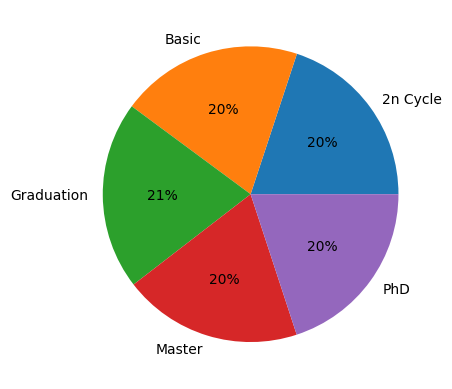

In [12]:
# Graph of Purchase recency to education 
rec_edu =  df.groupby("Education")['Recency'].agg('mean')
rec_edu
plt.pie(rec_edu, labels=rec_edu.index,autopct="%.0f%%")

In [13]:
# Graph of purchase recency to marital status 
rec_status = df.groupby("Marital_Status")["Recency"].agg("mean")
rec_status
px.bar(rec_status,title='Graph of purchase recency to marital status')

In [14]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [15]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
# Number of purchases by customers having kid at home 
kid_purchase = df.groupby("Kidhome")[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].agg('mean')
kid_purchase
px.bar(kid_purchase,barmode='stack',title='Number of purchases by customers having kid at home')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Number of purchases by customers having teen at home
teen_purchase =  df.groupby("Teenhome")[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].agg('mean')
teen_purchase
px.bar(teen_purchase,barmode='stack')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


/tmp/ipykernel_18/1790130635.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Income_bins'>

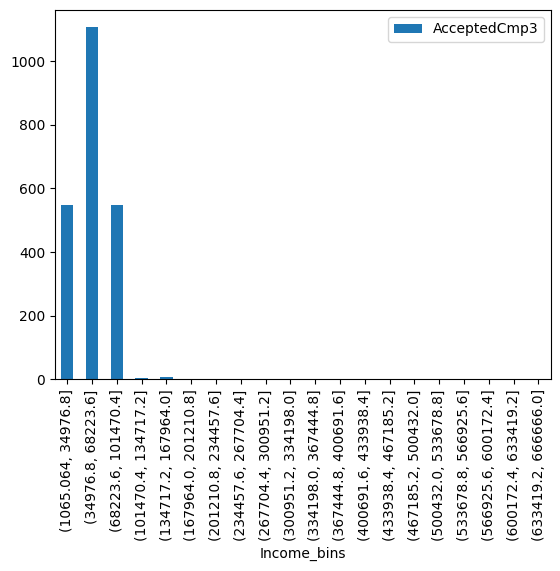

In [19]:
# Customer Income Vs Campaign offer acceptance
df["Income_bins"] = pd.cut(df['Income'],bins=20)
df["Income_bins"]
inc_acc = df.groupby("Income_bins")[['AcceptedCmp3']].count()
inc_acc.plot(kind = 'bar')


In [20]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Income_bins'],
      dtype='object')

In [21]:
df.shape

(2240, 29)

In [22]:
    X = df.drop(["Response","Income_bins","Dt_Customer"],axis=1)
    X

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,3,11
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,3,11
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,3,11
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,3,11
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,4,5,0,0,0,0,0,0,3,11
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,5,7,0,0,0,1,0,0,3,11
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,13,6,0,1,0,0,0,0,3,11
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,10,3,0,0,0,0,0,0,3,11


# Label Encoding

In [23]:
X.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
dtype: object

In [24]:

X["Year_Birth"] = X["Year_Birth"].astype('O')
#X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'])

In [25]:
X.dtypes

Year_Birth              object
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
dtype: object

In [26]:
categorical_columns = X.select_dtypes("object").columns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()

for i in categorical_columns:
    X[i] = le.fit_transform(X[i])



In [27]:
X.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,19,2,4,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,3,11
1,16,2,4,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,3,11
2,27,2,5,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,3,11
3,46,2,5,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,3,11
4,43,4,3,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,3,11


# Model Development

In [28]:
X.isnull().sum()
X["Income"].fillna(X["Income"].mean(),inplace=True)

/tmp/ipykernel_18/1222796231.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [29]:
from sklearn.cluster import KMeans


# DIMENSIONALITY REDUCTION 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-1.010399,-0.350141,0.251004,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
1,-1.265926,-0.350141,0.251004,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2,-0.328992,-0.350141,1.180340,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
3,1.289350,-0.350141,1.180340,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
4,1.033822,1.428354,-0.678332,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.158640,-0.350141,-0.678332,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,...,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2236,-1.947333,1.428354,1.180340,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,...,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0
2237,1.033822,-0.350141,-1.607669,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,...,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2238,-1.095575,0.539106,1.180340,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,...,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=5)
pca

PCA(n_components=5)

In [33]:
PCA_df = pca.fit_transform(scaled_df)
PCA_df = pd.DataFrame(PCA_df,columns=(['col1','col2','col3','col4','col5']))
PCA_df

,col1,col2,col3,col4,col5
0,3.528423,-0.267243,-1.674486,0.847318,-0.263515
1,-2.335050,0.199858,-0.018882,-1.200899,0.067835
2,1.690165,-0.235822,-0.866325,-0.457975,-0.286998
3,-2.483342,-1.442477,0.302206,0.231909,-0.317657
4,-0.389323,-0.025894,-0.356000,0.481609,-0.147563
...,...,...,...,...,...
2235,2.415152,0.970720,-1.667733,1.553906,0.016730
2236,-0.901847,3.004637,1.146228,0.661335,0.281803
2237,1.507426,0.094135,1.819908,0.091660,-1.854394
2238,1.848744,1.214694,-0.990789,-1.288474,0.548540


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

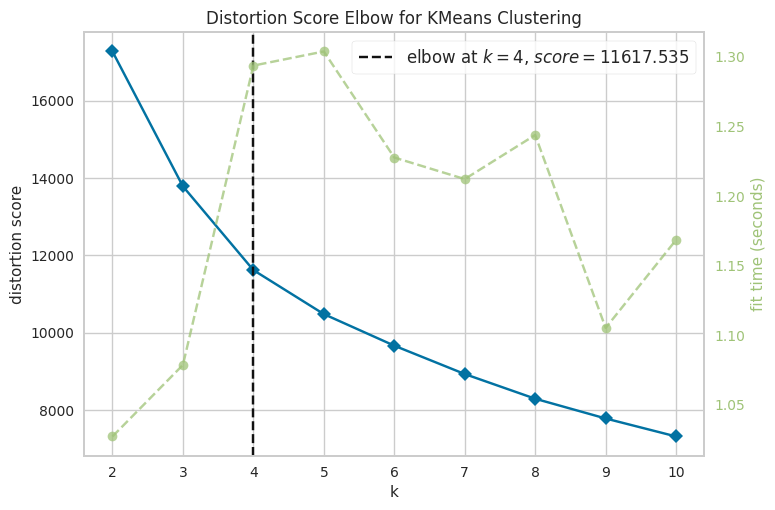

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer
k_elbow = KElbowVisualizer(KMeans(),k=10)
k_elbow.fit(PCA_df)
k_elbow.show()

In [35]:
kmeans1 = KMeans(n_clusters=4,random_state=42)
clusters = kmeans1.fit_predict(PCA_df)
clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 0, 3, ..., 2, 2, 0], dtype=int32)

In [36]:
kmeans1.inertia_

11617.574562898288

In [37]:
PCA_df["clusters"] = clusters


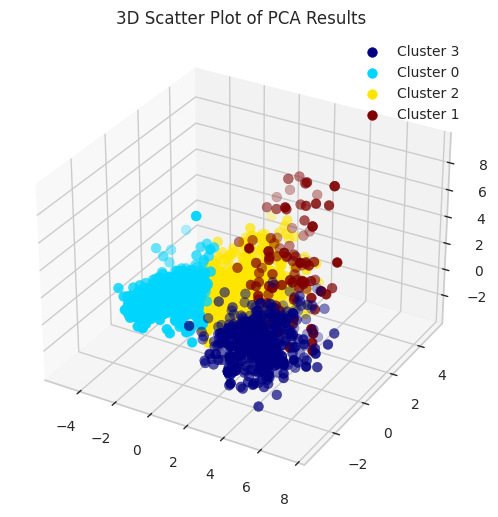

In [38]:
x = PCA_df["col1"]
y=PCA_df["col2"]
z=PCA_df["col3"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# unique clusters 
uniq_clusters = PCA_df["clusters"].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(uniq_clusters)))

# Plot each cluster
for cluster, color in zip(uniq_clusters, colors):
    ix = PCA_df['clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()


# EVALUATION

In [39]:
from sklearn.metrics import silhouette_score
score = silhouette_score(PCA_df, kmeans1.labels_)
score


0.38685779993473673

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(PCA_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(PCA_df, label, metric='euclidean')
    inertia1= kmeans.inertia_
    print("For n_clusters={}, The Silhouette Coefficient is {} , The inertia is {}" .format(n_cluster, sil_coeff,inertia1))

For n_clusters=2, The Silhouette Coefficient is 0.39601931012728225 , The inertia is 18572.55944433265
For n_clusters=3, The Silhouette Coefficient is 0.36807184754097255 , The inertia is 14123.45560276607
For n_clusters=4, The Silhouette Coefficient is 0.38685779993473673 , The inertia is 11617.574562898288
For n_clusters=5, The Silhouette Coefficient is 0.27527403195131533 , The inertia is 10621.412241379217
For n_clusters=6, The Silhouette Coefficient is 0.23401651833732454 , The inertia is 9898.161801471582
For n_clusters=7, The Silhouette Coefficient is 0.24157343313755456 , The inertia is 9214.2890115575
For n_clusters=8, The Silhouette Coefficient is 0.24792125412138566 , The inertia is 8594.476522390454
For n_clusters=9, The Silhouette Coefficient is 0.2581197791783253 , The inertia is 8083.062980587709
For n_clusters=10, The Silhouette Coefficient is 0.2544991446421734 , The inertia is 7608.519414373213
